In [2]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

In [20]:
file = 'bb8f672d-593d-4820-b963-bc7ba00eae18.h5ad'
adata = sc.read_h5ad(file)

cell_types = adata.obs['cell_type']
print(cell_types)


EC3_AACCATGTCACGAAGG     mature microglial cell
EC3_AATCGGTCACTTACGA     mature microglial cell
EC3_ACAGCTAAGTGTCCCG     mature microglial cell
EC3_ACAGCTACAAGGACAC     mature microglial cell
EC3_ACAGCTAGTGATGTCT     mature microglial cell
                                  ...          
EC10_TTTCCTCGTGGTAACG    mature microglial cell
EC10_TTTCCTCGTTTGACAC    mature microglial cell
EC10_TTTCCTCTCACAGGCC    mature microglial cell
EC10_TTTGTCACAAGCGTAG    mature microglial cell
EC10_TTTGTCATCTATCGCC    mature microglial cell
Name: cell_type, Length: 5572, dtype: category
Categories (1, object): ['mature microglial cell']


In [21]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["microglial"] = adata.var_names.str.startswith("EC")

In [31]:
sc.pp.calculate_qc_metrics(
    adata, inplace=True, log1p=True
)
print(adata.obs_keys)

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 5572 × 32743
    obs: 'SampleID', 'donor_id', 'BraakStage', 'SampleBatch', 'nUMI', 'nGene', 'initialClusterAssignments', 'seurat.subclusters', 'subclusterAssignment', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', '

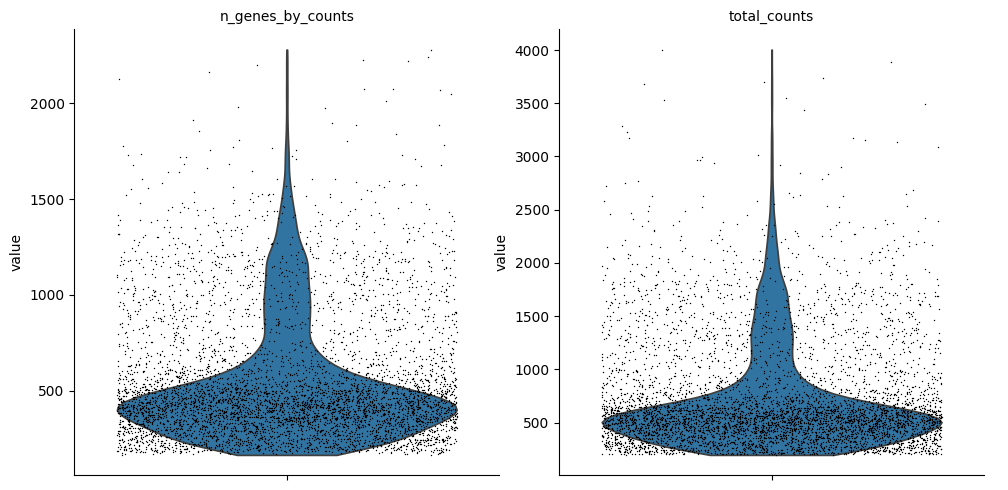

In [25]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)

In [32]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [33]:
sc.pp.scrublet(adata)

In [34]:
#Normalize and Log
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [35]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

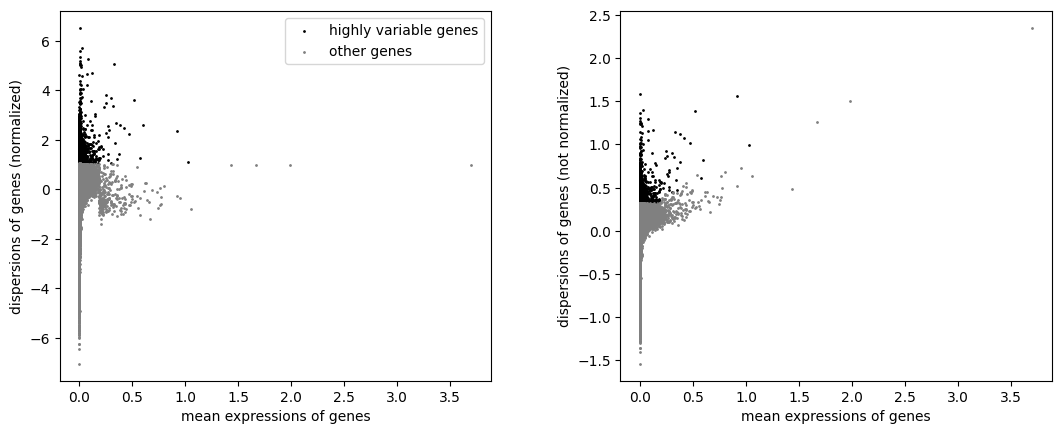

In [36]:
sc.pl.highly_variable_genes(adata)

In [37]:
sc.tl.pca(adata)

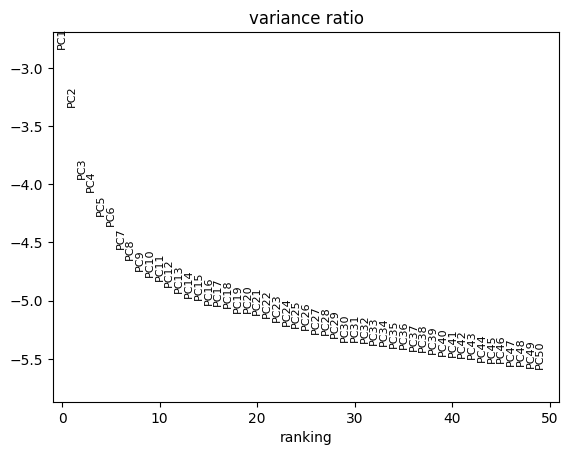

In [38]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [43]:
#print(adata.var_names)
#.var_names or .obs.columns
print(adata.obs.columns)

Index(['SampleID', 'donor_id', 'BraakStage', 'SampleBatch', 'nUMI', 'nGene',
       'initialClusterAssignments', 'seurat.subclusters',
       'subclusterAssignment', 'tissue_ontology_term_id',
       'cell_type_ontology_term_id', 'assay_ontology_term_id',
       'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'organism_ontology_term_id', 'suspension_type',
       'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'n_genes', 'doublet_score',
       'predicted_doublet'],
      dtype='object')


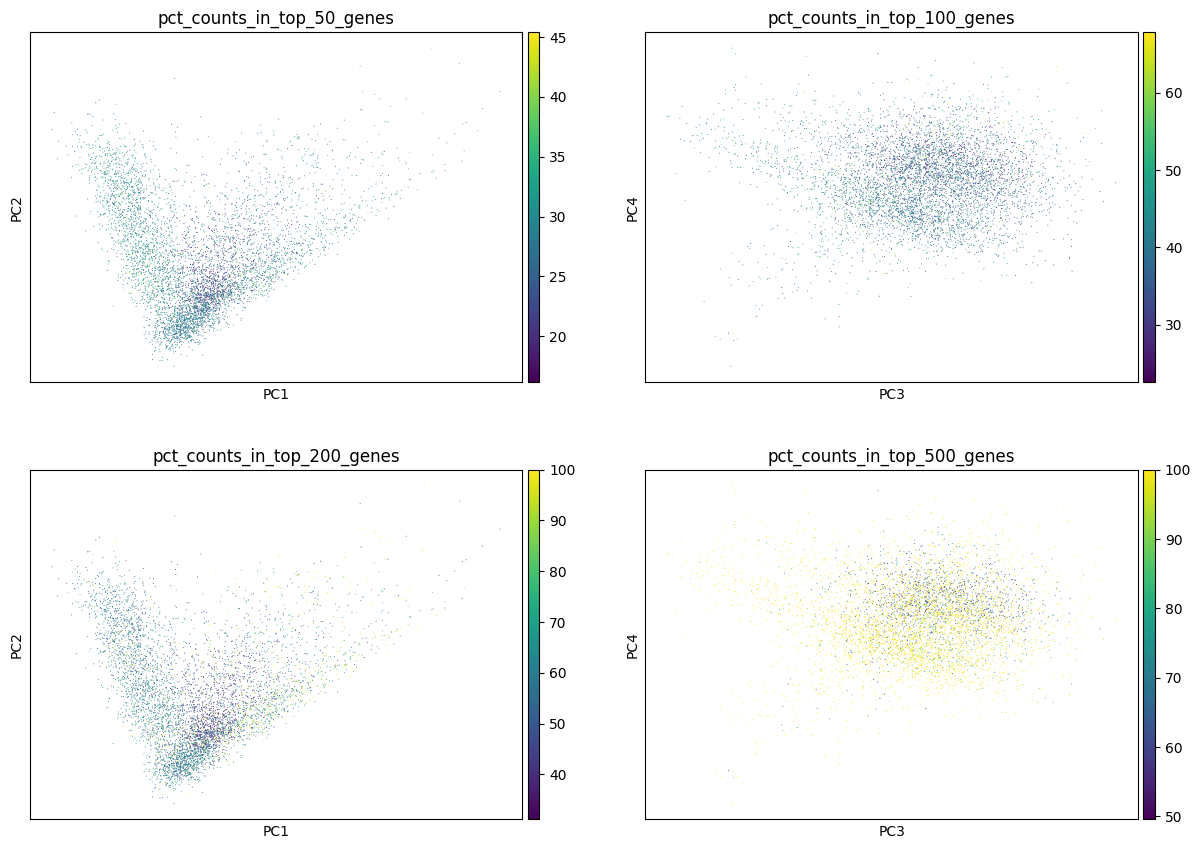

In [44]:
sc.pl.pca(
    adata,
    color=["pct_counts_in_top_50_genes", "pct_counts_in_top_100_genes", "pct_counts_in_top_200_genes", "pct_counts_in_top_500_genes"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)